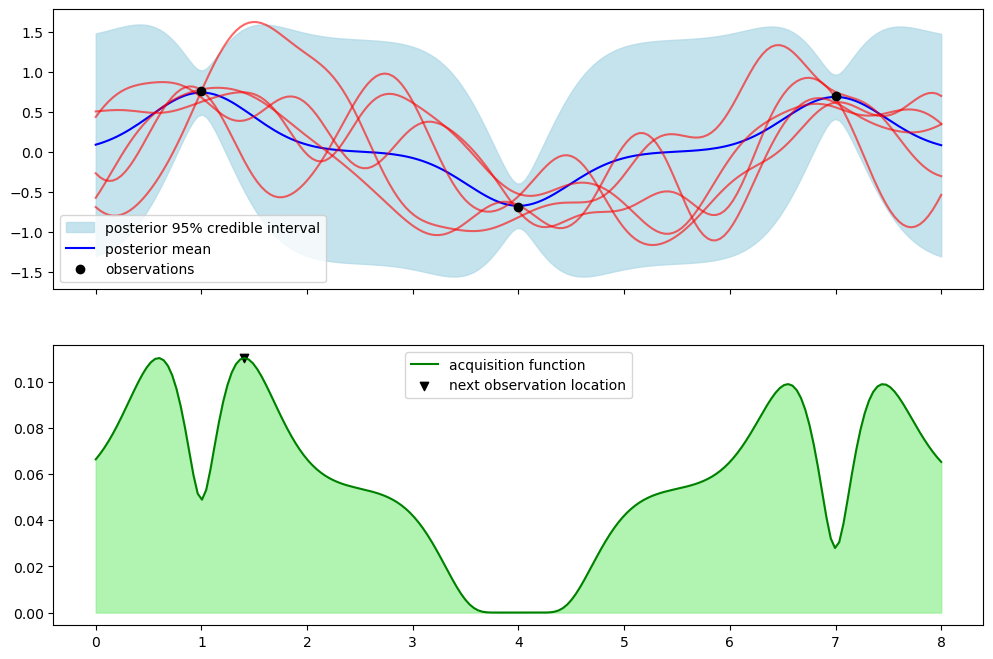

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
from scipy.stats import norm

# Generate synthetic data
X_obs = np.array([[1.], [4.], [7.]])
Y_obs = np.sin(X_obs) + np.random.randn(*X_obs.shape) * 0.1

# Fit Gaussian Process
gp_model = GPy.models.GPRegression(X_obs, Y_obs, kernel=GPy.kern.RBF(input_dim=1, lengthscale=1.0))
gp_model.Gaussian_noise.variance = 0.01
gp_model.optimize()

# Predictions
X = np.linspace(0, 8, 200).reshape(-1, 1)
mu, variance = gp_model.predict(X)
sigma = np.sqrt(variance)

# Sampling from GP posterior (multiple samples)
samples = gp_model.posterior_samples_f(X, size=5)

# Acquisition Function (Expected Improvement example)
def EI(mu, sigma, f_best):
    with np.errstate(divide='warn'):
        Z = (mu - f_best) / sigma
        ei = (mu - f_best) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
        return ei

f_best = Y_obs.max()
ei = EI(mu.flatten(), sigma.flatten(), f_best)
next_x = X[np.argmax(ei)]

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# GP Posterior
ax1.fill_between(X.flatten(), (mu - 1.96 * sigma).flatten(), (mu + 1.96 * sigma).flatten(), color='lightblue', alpha=0.7, label='posterior 95% credible interval')
ax1.plot(X, mu, 'b-', label='posterior mean')
for i in range(samples.shape[2]):
    ax1.plot(X, samples[:, :, i], 'r-', alpha=0.6)
ax1.plot(X_obs, Y_obs, 'ko', label='observations')
ax1.legend()

# Acquisition function
ax2.plot(X, ei, 'g-', label='acquisition function')
ax2.fill_between(X.flatten(), 0, ei, color='lightgreen', alpha=0.7)
# ax2.axvline(next_x, color='k', linestyle='--', label='next observation location')
ax2.scatter([next_x], [np.max(ei)], color='k', marker='v', label='next observation location')
ax2.legend()

plt.show()


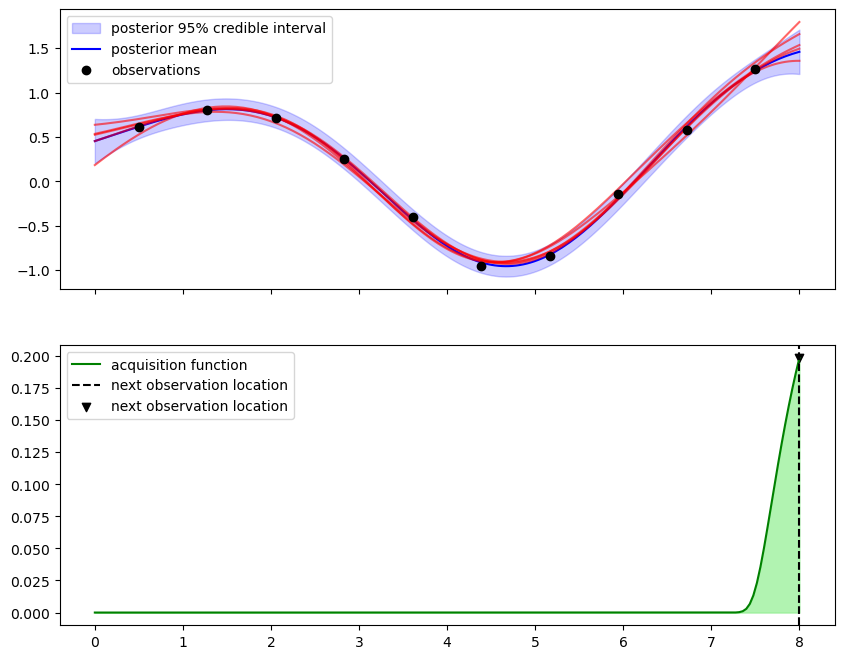

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
from scipy.stats import norm

# Generate synthetic data
X_obs = np.linspace(0.5, 7.5, 10).reshape(-1, 1)
Y_obs = np.sin(X_obs) + np.random.randn(*X_obs.shape) * 0.1

# Fit Gaussian Process
gp_model = GPy.models.GPRegression(X_obs, Y_obs, kernel=GPy.kern.RBF(input_dim=1, lengthscale=1.0))
gp_model.Gaussian_noise.variance = 0.01
gp_model.optimize()

# Predictive distribution
X = np.linspace(0, 8, 200).reshape(-1, 1)
mu, variance = gp_model.predict(X)
sigma = np.sqrt(variance)

# Sample from GP posterior
samples = gp_model.posterior_samples_f(X, size=5)

# Acquisition Function (Expected Improvement)
def EI(mu, sigma, f_best):
    with np.errstate(divide='warn'):
        Z = (mu - f_best) / sigma
        ei = (mu - f_best) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
        return ei

from scipy.stats import norm
f_best = Y_obs.max()
ei = EI(mu.flatten(), sigma.flatten(), f_best)
next_x = X[np.argmax(ei)]

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# GP Posterior
ax1.fill_between(X.flatten(), (mu - 1.96 * sigma).flatten(), (mu + 1.96 * sigma).flatten(),
                 color='blue', alpha=0.2, label='posterior 95% credible interval')
ax1.plot(X, mu, 'b-', label='posterior mean')
for i in range(samples.shape[2]):
    ax1.plot(X, samples[:, :, i], 'r-', alpha=0.6)
ax1.plot(X_obs, Y_obs, 'ko', label='observations')
ax1.legend()

# Acquisition function
ax2.plot(X, ei, 'g-', label='acquisition function')
ax2.fill_between(X.flatten(), 0, ei, color='lightgreen', alpha=0.7)
ax2.axvline(next_x, color='k', linestyle='--', label='next observation location')
ax2.scatter([next_x], [np.max(ei)], color='k', marker='v', label='next observation location')
ax2.legend()

plt.show()

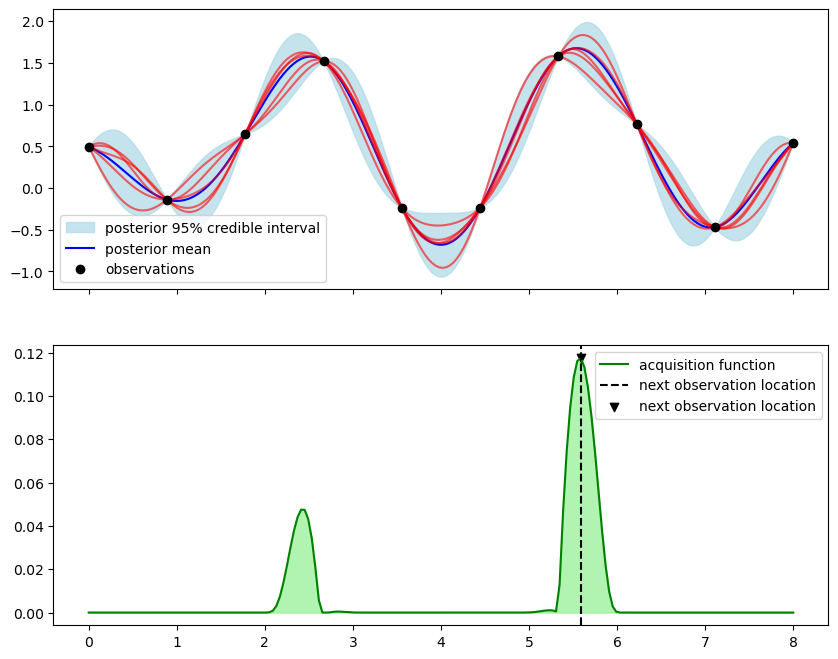

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
from scipy.stats import norm

# Generate synthetic random data
np.random.seed(42)
X_obs = np.linspace(0, 8, 10).reshape(-1, 1)
Y_obs = np.random.randn(10, 1)

# Fit Gaussian Process
gp_model = GPy.models.GPRegression(X_obs, Y_obs, kernel=GPy.kern.RBF(input_dim=1, lengthscale=1.0))
gp_model.Gaussian_noise.variance = 0.01
gp_model.optimize()

# Predictions
X = np.linspace(0, 8, 200).reshape(-1, 1)
mu, variance = gp_model.predict(X)
sigma = np.sqrt(variance)

# Sampling from GP posterior (multiple samples)
samples = gp_model.posterior_samples_f(X, size=5)

# Acquisition Function (Expected Improvement example)
def EI(mu, sigma, f_best):
    with np.errstate(divide='warn'):
        Z = (mu - f_best) / sigma
        ei = (mu - f_best) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
        return ei

f_best = Y_obs.max()
ei = EI(mu.flatten(), sigma.flatten(), f_best)
next_x = X[np.argmax(ei)]

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# GP Posterior
ax1.fill_between(X.flatten(), (mu - 1.96 * sigma).flatten(), (mu + 1.96 * sigma).flatten(), color='lightblue', alpha=0.7, label='posterior 95% credible interval')
ax1.plot(X, mu, 'b-', label='posterior mean')
for i in range(samples.shape[2]):
    ax1.plot(X, samples[:, :, i], 'r-', alpha=0.6)
ax1.plot(X_obs, Y_obs, 'ko', label='observations')
ax1.legend()

# Acquisition function
ax2.plot(X, ei, 'g-', label='acquisition function')
ax2.fill_between(X.flatten(), 0, ei, color='lightgreen', alpha=0.7)
ax2.axvline(next_x, color='k', linestyle='--', label='next observation location')
ax2.scatter([next_x], [np.max(ei)], color='k', marker='v', label='next observation location')
ax2.legend()

plt.show()


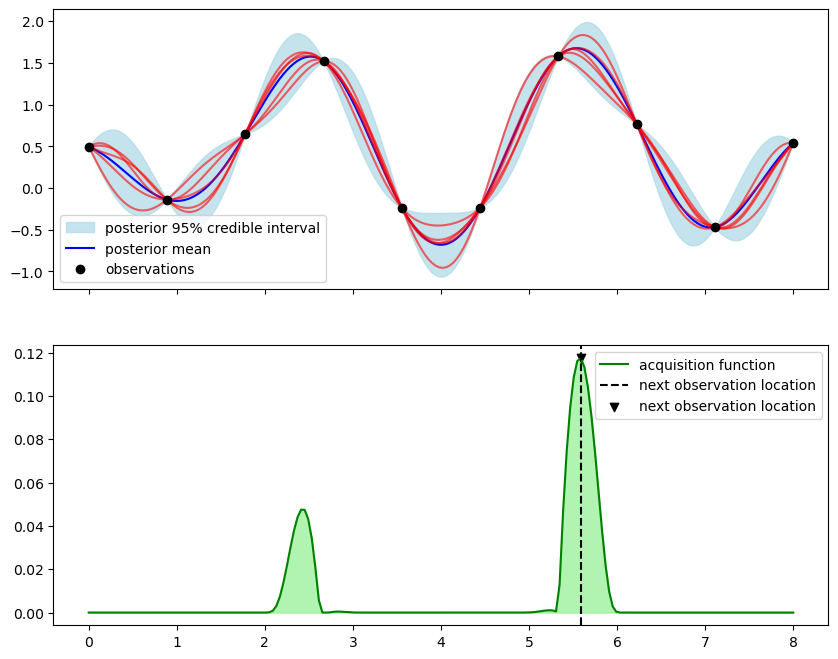

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
from scipy.stats import norm

# Generate synthetic random data
np.random.seed(42)
X_obs = np.linspace(0, 8, 10).reshape(-1, 1)
Y_obs = np.random.randn(10, 1)

# Fit Gaussian Process
gp_model = GPy.models.GPRegression(X_obs, Y_obs, kernel=GPy.kern.RBF(input_dim=1, lengthscale=1.0))
gp_model.Gaussian_noise.variance = 0.01
gp_model.optimize()

# Predictions
X = np.linspace(0, 8, 200).reshape(-1, 1)
mu, variance = gp_model.predict(X)
sigma = np.sqrt(variance)

# Sampling from GP posterior (multiple samples)
samples = gp_model.posterior_samples_f(X, size=5)

# Acquisition Function (Expected Improvement example)
def EI(mu, sigma, f_best):
    with np.errstate(divide='warn'):
        Z = (mu - f_best) / sigma
        ei = (mu - f_best) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
        return ei

f_best = Y_obs.max()
ei = EI(mu.flatten(), sigma.flatten(), f_best)
next_x = X[np.argmax(ei)]

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# GP Posterior
ax1.fill_between(X.flatten(), (mu - 1.96 * sigma).flatten(), (mu + 1.96 * sigma).flatten(), color='lightblue', alpha=0.7, label='posterior 95% credible interval')
ax1.plot(X, mu, 'b-', label='posterior mean')
for i in range(samples.shape[2]):
    ax1.plot(X, samples[:, :, i], 'r-', alpha=0.6)
ax1.plot(X_obs, Y_obs, 'ko', label='observations')
ax1.legend()

# Acquisition function
ax2.plot(X, ei, 'g-', label='acquisition function')
ax2.fill_between(X.flatten(), 0, ei, color='lightgreen', alpha=0.7)
ax2.axvline(next_x, color='k', linestyle='--', label='next observation location')
ax2.scatter([next_x], [np.max(ei)], color='k', marker='v', label='next observation location')
ax2.legend()

plt.show()


 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/2870877495.py:87: UserWarning:Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/2870877495.py:87: UserWarning:Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/2870877495.py:87: UserWarning:Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/2870877495.py:87: UserWarning:Glyph 24322 (\N{CJK UNIFIED IDEOGRAPH-5F02}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/2870877495.py:87: UserWarning:Glyph 26500 (\N{CJK UNIFIED IDEOGRAPH-6784}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/2870877495.py:87: UserWarning:Glyph 22122 (\N{CJK UNIFIED I

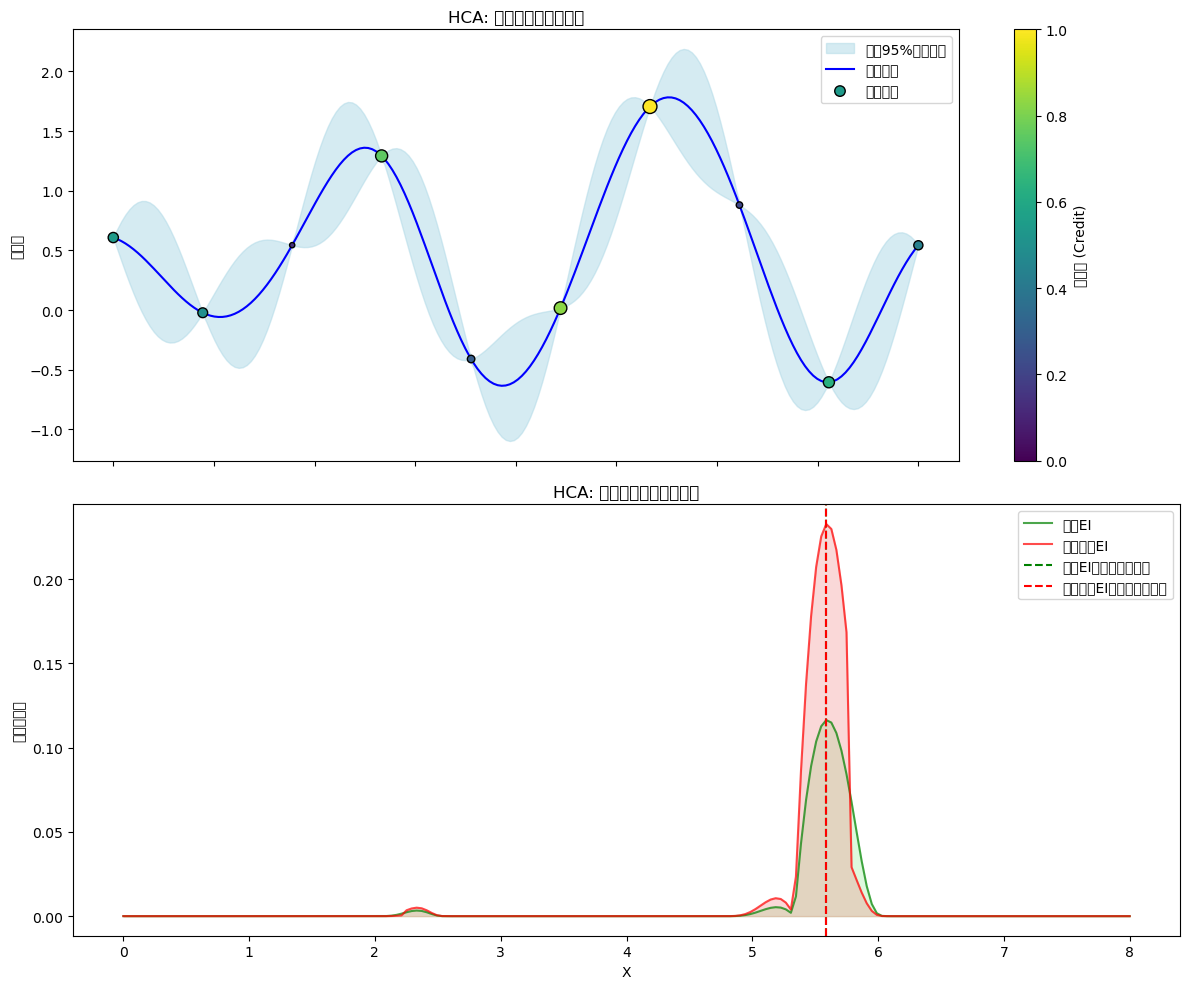

In [13]:
# 添加HCA可视化部分
fig_hca, ax_hca = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# 第一部分：异构噪声下的预测值与信用分配
# 生成模拟的信用值
np.random.seed(123)
credits = np.clip(np.abs(np.random.randn(len(X_obs))), 0.1, 2.0)

# 构建更多样本点用于展示
X_dense = np.linspace(0, 8, 200).reshape(-1, 1)
Y_dense = np.sin(X_dense) + 0.1 * np.cos(5 * X_dense) + np.random.randn(200, 1) * 0.1

# 基于信用值的异构噪声
noise_scale = 1.0 / np.sqrt(np.clip(credits, 0.1, 10.0))
noise_adjusted = np.array([ns * np.random.randn() for ns in noise_scale])

# 模拟合成的异构噪声样本
X_hca = X_obs.copy()
Y_hca = Y_obs.copy() + noise_adjusted.reshape(-1, 1) * 0.2

# 拟合GP模型
kernel = GPy.kern.RBF(input_dim=1, lengthscale=1.0)
gp_hca = GPy.models.GPRegression(X_hca, Y_hca, kernel=kernel)
gp_hca.Gaussian_noise.variance = 0.01
gp_hca.optimize()

# 预测
mu_hca, var_hca = gp_hca.predict(X_dense)
sigma_hca = np.sqrt(var_hca)

# 可视化异构噪声和信用值
ax_hca[0].fill_between(X_dense.flatten(), 
                      (mu_hca - 1.96 * sigma_hca).flatten(), 
                      (mu_hca + 1.96 * sigma_hca).flatten(), 
                      color='lightblue', alpha=0.5, 
                      label='预测95%置信区间')
ax_hca[0].plot(X_dense, mu_hca, 'b-', label='预测均值')

# 用信用值调整点的大小和颜色
sizes = 50 * credits
colors = plt.cm.viridis(credits / np.max(credits))
scatter = ax_hca[0].scatter(X_hca, Y_hca, s=sizes, c=colors, 
                           edgecolor='k', label='观测样本', zorder=10)

# 添加颜色条
cbar = plt.colorbar(scatter, ax=ax_hca[0])
cbar.set_label('信用值 (Credit)')

ax_hca[0].set_ylabel('函数值')
ax_hca[0].set_title('HCA: 异构噪声与信用分配')
ax_hca[0].legend()

# 第二部分：使用信用值加权的采集函数
# 计算标准EI
f_best_hca = Y_hca.max()
ei_standard = EI(mu_hca.flatten(), sigma_hca.flatten(), f_best_hca)

# 计算信用值加权的EI（模拟）
# 为测试点分配信用值：基于与已知样本点的距离
from scipy.spatial.distance import cdist
dists = cdist(X_dense, X_hca)
nearest_indices = np.argmin(dists, axis=1)
candidate_credits = credits[nearest_indices]

# 信用加权EI
ei_credit = ei_standard * candidate_credits

# 获取下一个采样点位置
next_x_standard = X_dense[np.argmax(ei_standard)]
next_x_credit = X_dense[np.argmax(ei_credit)]

# 绘制标准EI和信用加权EI
ax_hca[1].plot(X_dense, ei_standard, 'g-', label='标准EI', alpha=0.7)
ax_hca[1].plot(X_dense, ei_credit, 'r-', label='信用加权EI', alpha=0.7)
ax_hca[1].fill_between(X_dense.flatten(), 0, ei_standard, color='lightgreen', alpha=0.3)
ax_hca[1].fill_between(X_dense.flatten(), 0, ei_credit, color='lightcoral', alpha=0.3)

# 标记下一个采样点
ax_hca[1].axvline(next_x_standard, color='g', linestyle='--', label='标准EI下一个观测位置')
ax_hca[1].axvline(next_x_credit, color='r', linestyle='--', label='信用加权EI下一个观测位置')
ax_hca[1].legend()

ax_hca[1].set_xlabel('X')
ax_hca[1].set_ylabel('采集函数值')
ax_hca[1].set_title('HCA: 信用加权采集函数对比')

plt.tight_layout()
plt.show()

 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:59: UserWarning:Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:59: UserWarning:Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:59: UserWarning:Glyph 36125 (\N{CJK UNIFIED IDEOGRAPH-8D1D}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:59: UserWarning:Glyph 21494 (\N{CJK UNIFIED IDEOGRAPH-53F6}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:59: UserWarning:Glyph 26031 (\N{CJK UNIFIED IDEOGRAPH-65AF}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:59: UserWarning:Glyph 20248 (\N{CJK UNIFIED IDEOGRA

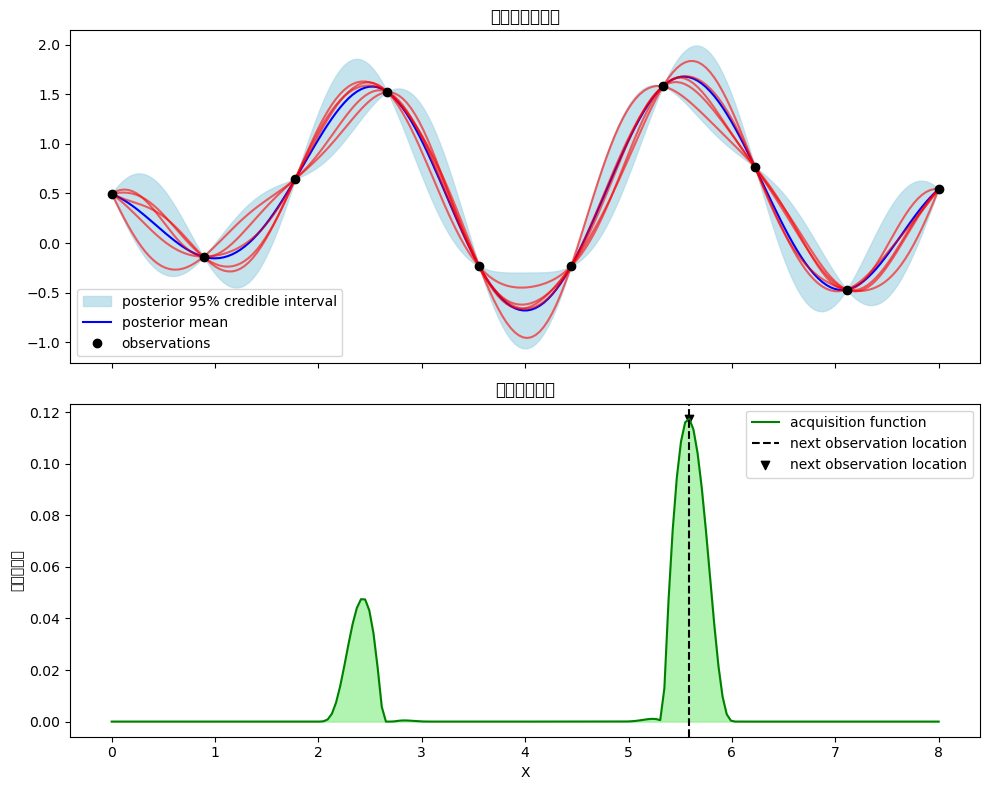

 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:147: UserWarning:Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:147: UserWarning:Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:147: UserWarning:Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:147: UserWarning:Glyph 24322 (\N{CJK UNIFIED IDEOGRAPH-5F02}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:147: UserWarning:Glyph 26500 (\N{CJK UNIFIED IDEOGRAPH-6784}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:147: UserWarning:Glyph 22122 (\N{CJK UNIFIED I

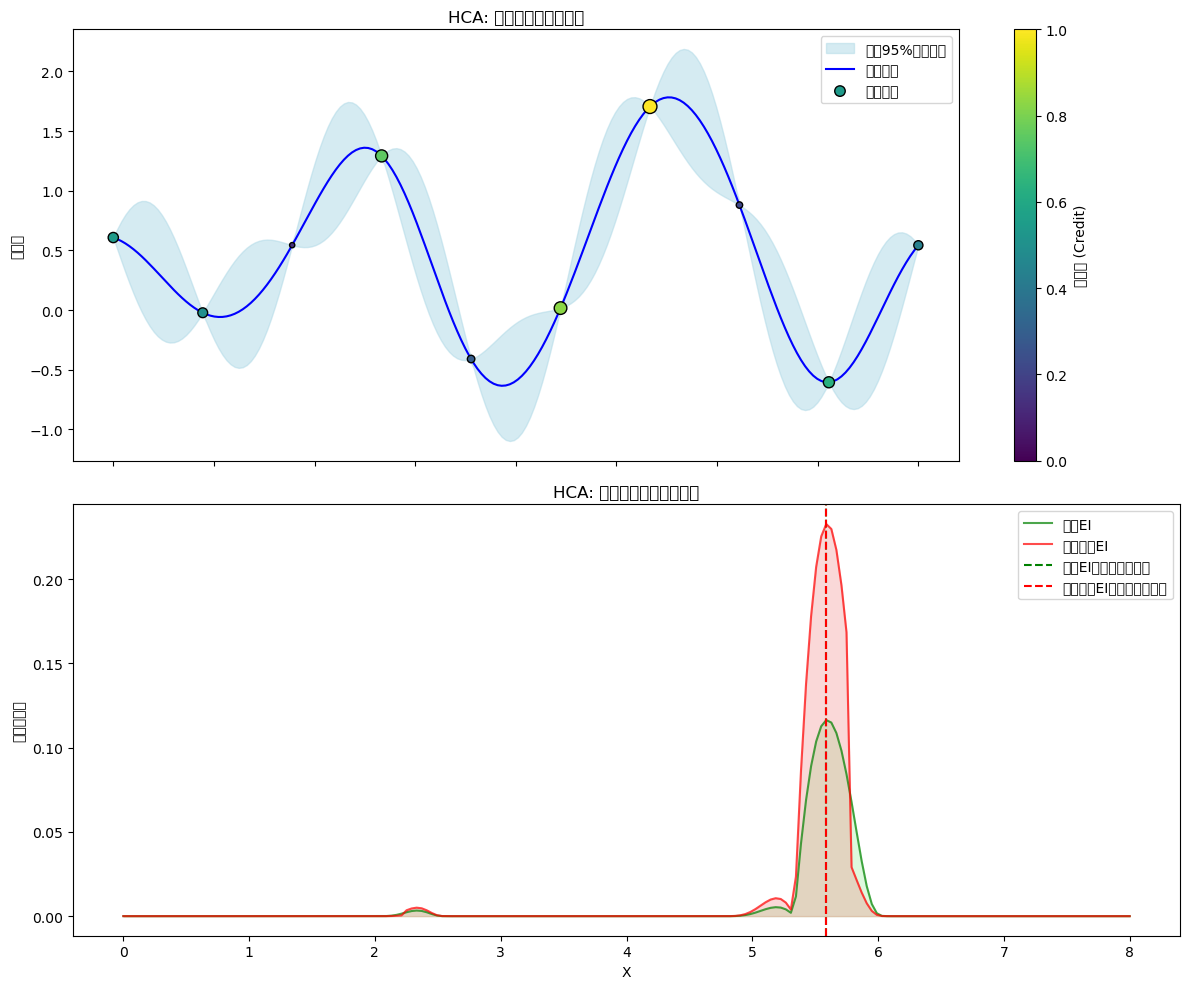

 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:198: UserWarning:Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:198: UserWarning:Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:198: UserWarning:Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:198: UserWarning:Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:198: UserWarning:Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/340796664.py:198: UserWarning:Glyph 21248 (\N{CJK UNIFIED I

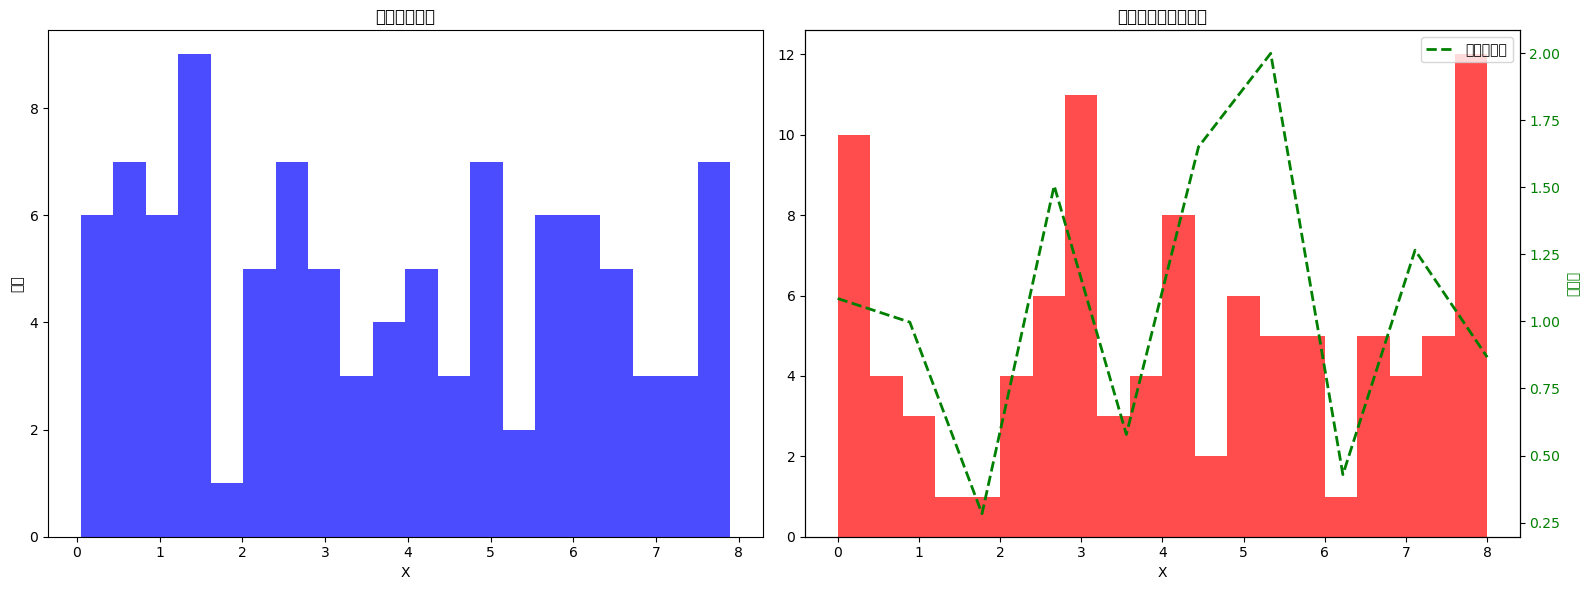

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
from scipy.stats import norm
from scipy.spatial.distance import cdist

# Generate synthetic random data
np.random.seed(42)
X_obs = np.linspace(0, 8, 10).reshape(-1, 1)
Y_obs = np.random.randn(10, 1)

# Fit Gaussian Process
gp_model = GPy.models.GPRegression(X_obs, Y_obs, kernel=GPy.kern.RBF(input_dim=1, lengthscale=1.0))
gp_model.Gaussian_noise.variance = 0.01
gp_model.optimize()

# Predictions
X = np.linspace(0, 8, 200).reshape(-1, 1)
mu, variance = gp_model.predict(X)
sigma = np.sqrt(variance)

# Sampling from GP posterior (multiple samples)
samples = gp_model.posterior_samples_f(X, size=5)

# Acquisition Function (Expected Improvement example)
def EI(mu, sigma, f_best):
    with np.errstate(divide='warn'):
        Z = (mu - f_best) / sigma
        ei = (mu - f_best) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
        return ei

f_best = Y_obs.max()
ei = EI(mu.flatten(), sigma.flatten(), f_best)
next_x = X[np.argmax(ei)]

# 原始图表：标准贝叶斯优化
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# GP Posterior
ax1.fill_between(X.flatten(), (mu - 1.96 * sigma).flatten(), (mu + 1.96 * sigma).flatten(), color='lightblue', alpha=0.7, label='posterior 95% credible interval')
ax1.plot(X, mu, 'b-', label='posterior mean')
for i in range(samples.shape[2]):
    ax1.plot(X, samples[:, :, i], 'r-', alpha=0.6)
ax1.plot(X_obs, Y_obs, 'ko', label='observations')
ax1.legend()

# Acquisition function
ax2.plot(X, ei, 'g-', label='acquisition function')
ax2.fill_between(X.flatten(), 0, ei, color='lightgreen', alpha=0.7)
ax2.axvline(next_x, color='k', linestyle='--', label='next observation location')
ax2.scatter([next_x], [np.max(ei)], color='k', marker='v', label='next observation location')
ax2.legend()
ax2.set_xlabel('X')
ax2.set_ylabel('采集函数值')
ax1.set_title('标准贝叶斯优化')
ax2.set_title('标准采集函数')

plt.tight_layout()
plt.show()

# 添加HCA可视化部分
fig_hca, ax_hca = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# 第一部分：异构噪声下的预测值与信用分配
# 生成模拟的信用值
np.random.seed(123)
credits = np.clip(np.abs(np.random.randn(len(X_obs))), 0.1, 2.0)

# 构建更多样本点用于展示
X_dense = np.linspace(0, 8, 200).reshape(-1, 1)
Y_dense = np.sin(X_dense) + 0.1 * np.cos(5 * X_dense) + np.random.randn(200, 1) * 0.1

# 基于信用值的异构噪声
noise_scale = 1.0 / np.sqrt(np.clip(credits, 0.1, 10.0))
noise_adjusted = np.array([ns * np.random.randn() for ns in noise_scale])

# 模拟合成的异构噪声样本
X_hca = X_obs.copy()
Y_hca = Y_obs.copy() + noise_adjusted.reshape(-1, 1) * 0.2

# 拟合GP模型
kernel = GPy.kern.RBF(input_dim=1, lengthscale=1.0)
gp_hca = GPy.models.GPRegression(X_hca, Y_hca, kernel=kernel)
gp_hca.Gaussian_noise.variance = 0.01
gp_hca.optimize()

# 预测
mu_hca, var_hca = gp_hca.predict(X_dense)
sigma_hca = np.sqrt(var_hca)

# 可视化异构噪声和信用值
ax_hca[0].fill_between(X_dense.flatten(), 
                      (mu_hca - 1.96 * sigma_hca).flatten(), 
                      (mu_hca + 1.96 * sigma_hca).flatten(), 
                      color='lightblue', alpha=0.5, 
                      label='预测95%置信区间')
ax_hca[0].plot(X_dense, mu_hca, 'b-', label='预测均值')

# 用信用值调整点的大小和颜色
sizes = 50 * credits
colors = plt.cm.viridis(credits / np.max(credits))
scatter = ax_hca[0].scatter(X_hca, Y_hca, s=sizes, c=colors, 
                           edgecolor='k', label='观测样本', zorder=10)

# 添加颜色条
cbar = plt.colorbar(scatter, ax=ax_hca[0])
cbar.set_label('信用值 (Credit)')

ax_hca[0].set_ylabel('函数值')
ax_hca[0].set_title('HCA: 异构噪声与信用分配')
ax_hca[0].legend()

# 第二部分：使用信用值加权的采集函数
# 计算标准EI
f_best_hca = Y_hca.max()
ei_standard = EI(mu_hca.flatten(), sigma_hca.flatten(), f_best_hca)

# 计算信用值加权的EI（模拟）
# 为测试点分配信用值：基于与已知样本点的距离
dists = cdist(X_dense, X_hca)
nearest_indices = np.argmin(dists, axis=1)
candidate_credits = credits[nearest_indices]

# 信用加权EI
ei_credit = ei_standard * candidate_credits

# 获取下一个采样点位置
next_x_standard = X_dense[np.argmax(ei_standard)]
next_x_credit = X_dense[np.argmax(ei_credit)]

# 绘制标准EI和信用加权EI
ax_hca[1].plot(X_dense, ei_standard, 'g-', label='标准EI', alpha=0.7)
ax_hca[1].plot(X_dense, ei_credit, 'r-', label='信用加权EI', alpha=0.7)
ax_hca[1].fill_between(X_dense.flatten(), 0, ei_standard, color='lightgreen', alpha=0.3)
ax_hca[1].fill_between(X_dense.flatten(), 0, ei_credit, color='lightcoral', alpha=0.3)

# 标记下一个采样点
ax_hca[1].axvline(next_x_standard, color='g', linestyle='--', label='标准EI下一个观测位置')
ax_hca[1].axvline(next_x_credit, color='r', linestyle='--', label='信用加权EI下一个观测位置')
ax_hca[1].legend()

ax_hca[1].set_xlabel('X')
ax_hca[1].set_ylabel('采集函数值')
ax_hca[1].set_title('HCA: 信用加权采集函数对比')

plt.tight_layout()
plt.show()

# 第三个图：HCA对采样点分布的影响
fig3, ax3 = plt.subplots(1, 2, figsize=(16, 6))

# 左图：标准采样
np.random.seed(42)
X_standard = np.random.rand(100, 1) * 8

# 右图：基于信用的加权采样
def sample_with_credit_bias(n_points, credits, X_reference, lb=0, ub=8, sigma_scale=0.5):
    # 基于信用值选择引用点
    probs = credits / np.sum(credits)
    selected_indices = np.random.choice(len(X_reference), size=n_points, p=probs, replace=True)
    reference_points = X_reference[selected_indices]
    
    # 生成噪声
    noise = np.random.normal(0, sigma_scale, size=(n_points, 1))
    
    # 生成新点 = 引用点 + 噪声
    X_biased = reference_points + noise
    
    # 确保点在边界内
    X_biased = np.maximum(X_biased, lb)
    X_biased = np.minimum(X_biased, ub)
    
    return X_biased

X_credit_biased = sample_with_credit_bias(100, credits, X_hca)

# 可视化
ax3[0].hist(X_standard, bins=20, color='blue', alpha=0.7)
ax3[0].set_title('标准均匀采样')
ax3[0].set_xlabel('X')
ax3[0].set_ylabel('频率')

ax3[1].hist(X_credit_biased, bins=20, color='red', alpha=0.7)
ax3[1].set_title('基于信用的加权采样')
ax3[1].set_xlabel('X')

# 在右图中叠加显示信用值分布
ax3_twin = ax3[1].twinx()
sorted_idx = np.argsort(X_hca.flatten())
X_sorted = X_hca[sorted_idx]
credits_sorted = credits[sorted_idx]
ax3_twin.plot(X_sorted, credits_sorted, 'g--', linewidth=2, label='信用值分布')
ax3_twin.set_ylabel('信用值', color='g')
ax3_twin.tick_params(axis='y', labelcolor='g')
ax3_twin.legend(loc='upper right')

plt.tight_layout()
plt.show()

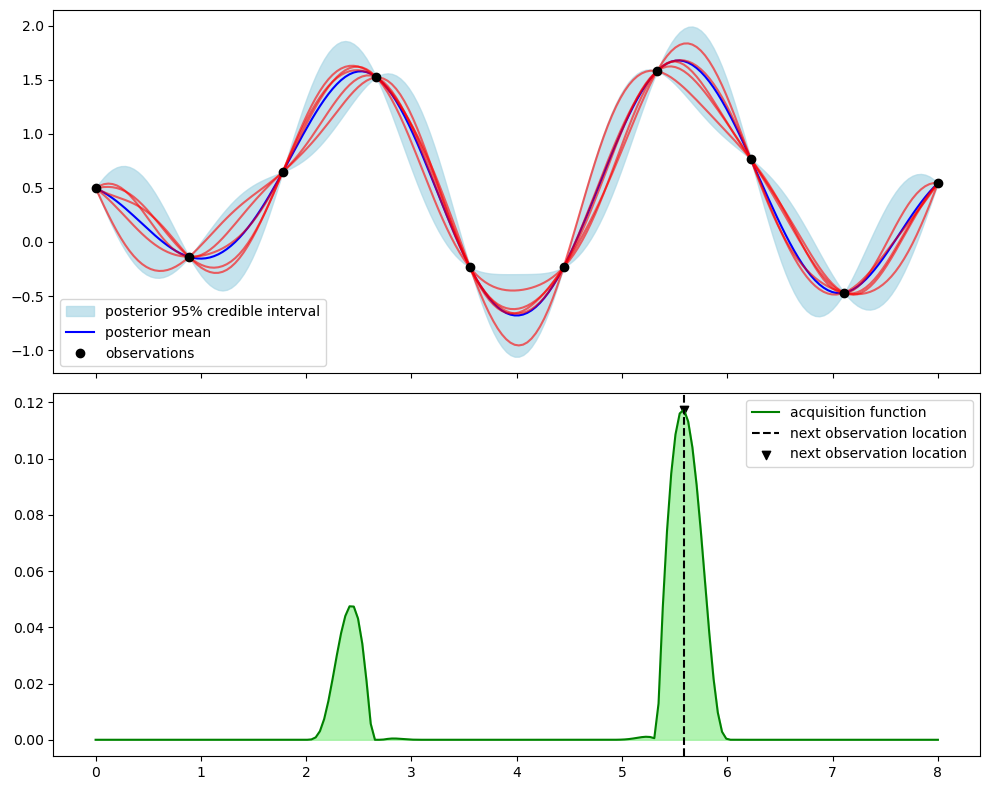

 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/974044505.py:143: UserWarning:Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/974044505.py:143: UserWarning:Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/974044505.py:143: UserWarning:Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/974044505.py:143: UserWarning:Glyph 24322 (\N{CJK UNIFIED IDEOGRAPH-5F02}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/974044505.py:143: UserWarning:Glyph 26500 (\N{CJK UNIFIED IDEOGRAPH-6784}) missing from font(s) DejaVu Sans.
 /var/folders/7r/7sdssj9s0rv11tlmpvygj85w0000gn/T/ipykernel_30876/974044505.py:143: UserWarning:Glyph 22122 (\N{CJK UNIFIED I

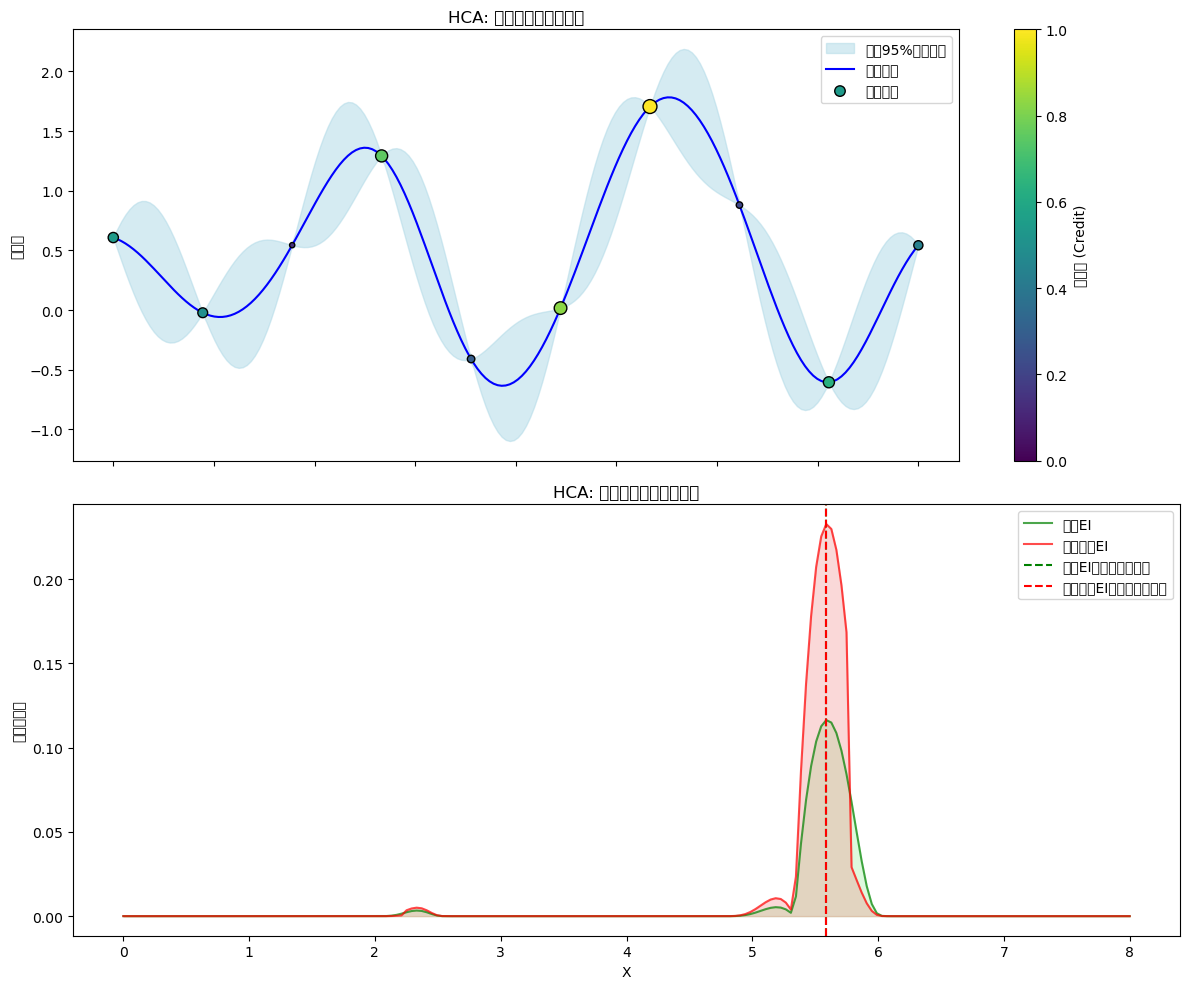

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
from scipy.stats import norm
from scipy.spatial.distance import cdist

# Generate synthetic random data
np.random.seed(42)
X_obs = np.linspace(0, 8, 10).reshape(-1, 1)
Y_obs = np.random.randn(10, 1)

# Fit Gaussian Process
gp_model = GPy.models.GPRegression(X_obs, Y_obs, kernel=GPy.kern.RBF(input_dim=1, lengthscale=1.0))
gp_model.Gaussian_noise.variance = 0.01
gp_model.optimize()

# Predictions
X = np.linspace(0, 8, 200).reshape(-1, 1)
mu, variance = gp_model.predict(X)
sigma = np.sqrt(variance)

# Sampling from GP posterior (multiple samples)
samples = gp_model.posterior_samples_f(X, size=5)

# Acquisition Function (Expected Improvement example)
def EI(mu, sigma, f_best):
    with np.errstate(divide='warn'):
        Z = (mu - f_best) / sigma
        ei = (mu - f_best) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
        return ei

f_best = Y_obs.max()
ei = EI(mu.flatten(), sigma.flatten(), f_best)
next_x = X[np.argmax(ei)]

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# GP Posterior
ax1.fill_between(X.flatten(), (mu - 1.96 * sigma).flatten(), (mu + 1.96 * sigma).flatten(), color='lightblue', alpha=0.7, label='posterior 95% credible interval')
ax1.plot(X, mu, 'b-', label='posterior mean')
for i in range(samples.shape[2]):
    ax1.plot(X, samples[:, :, i], 'r-', alpha=0.6)
ax1.plot(X_obs, Y_obs, 'ko', label='observations')
ax1.legend()

# Acquisition function
ax2.plot(X, ei, 'g-', label='acquisition function')
ax2.fill_between(X.flatten(), 0, ei, color='lightgreen', alpha=0.7)
ax2.axvline(next_x, color='k', linestyle='--', label='next observation location')
ax2.scatter([next_x], [np.max(ei)], color='k', marker='v', label='next observation location')
ax2.legend()

plt.tight_layout()
plt.show()

# 添加HCA可视化部分
fig_hca, ax_hca = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# 第一部分：异构噪声下的预测值与信用分配
# 生成模拟的信用值
np.random.seed(123)
credits = np.clip(np.abs(np.random.randn(len(X_obs))), 0.1, 2.0)

# 构建更多样本点用于展示
X_dense = np.linspace(0, 8, 200).reshape(-1, 1)
Y_dense = np.sin(X_dense) + 0.1 * np.cos(5 * X_dense) + np.random.randn(200, 1) * 0.1

# 基于信用值的异构噪声
noise_scale = 1.0 / np.sqrt(np.clip(credits, 0.1, 10.0))
noise_adjusted = np.array([ns * np.random.randn() for ns in noise_scale])

# 模拟合成的异构噪声样本
X_hca = X_obs.copy()
Y_hca = Y_obs.copy() + noise_adjusted.reshape(-1, 1) * 0.2

# 拟合GP模型
kernel = GPy.kern.RBF(input_dim=1, lengthscale=1.0)
gp_hca = GPy.models.GPRegression(X_hca, Y_hca, kernel=kernel)
gp_hca.Gaussian_noise.variance = 0.01
gp_hca.optimize()

# 预测
mu_hca, var_hca = gp_hca.predict(X_dense)
sigma_hca = np.sqrt(var_hca)

# 可视化异构噪声和信用值
ax_hca[0].fill_between(X_dense.flatten(), 
                      (mu_hca - 1.96 * sigma_hca).flatten(), 
                      (mu_hca + 1.96 * sigma_hca).flatten(), 
                      color='lightblue', alpha=0.5, 
                      label='预测95%置信区间')
ax_hca[0].plot(X_dense, mu_hca, 'b-', label='预测均值')

# 用信用值调整点的大小和颜色
sizes = 50 * credits
colors = plt.cm.viridis(credits / np.max(credits))
scatter = ax_hca[0].scatter(X_hca, Y_hca, s=sizes, c=colors, 
                           edgecolor='k', label='观测样本', zorder=10)

# 添加颜色条
cbar = plt.colorbar(scatter, ax=ax_hca[0])
cbar.set_label('信用值 (Credit)')

ax_hca[0].set_ylabel('函数值')
ax_hca[0].set_title('HCA: 异构噪声与信用分配')
ax_hca[0].legend()

# 第二部分：使用信用值加权的采集函数
# 计算标准EI
f_best_hca = Y_hca.max()
ei_standard = EI(mu_hca.flatten(), sigma_hca.flatten(), f_best_hca)

# 计算信用值加权的EI（模拟）
# 为测试点分配信用值：基于与已知样本点的距离
dists = cdist(X_dense, X_hca)
nearest_indices = np.argmin(dists, axis=1)
candidate_credits = credits[nearest_indices]

# 信用加权EI
ei_credit = ei_standard * candidate_credits

# 获取下一个采样点位置
next_x_standard = X_dense[np.argmax(ei_standard)]
next_x_credit = X_dense[np.argmax(ei_credit)]

# 绘制标准EI和信用加权EI
ax_hca[1].plot(X_dense, ei_standard, 'g-', label='标准EI', alpha=0.7)
ax_hca[1].plot(X_dense, ei_credit, 'r-', label='信用加权EI', alpha=0.7)
ax_hca[1].fill_between(X_dense.flatten(), 0, ei_standard, color='lightgreen', alpha=0.3)
ax_hca[1].fill_between(X_dense.flatten(), 0, ei_credit, color='lightcoral', alpha=0.3)

# 标记下一个采样点
ax_hca[1].axvline(next_x_standard, color='g', linestyle='--', label='标准EI下一个观测位置')
ax_hca[1].axvline(next_x_credit, color='r', linestyle='--', label='信用加权EI下一个观测位置')
ax_hca[1].legend()

ax_hca[1].set_xlabel('X')
ax_hca[1].set_ylabel('采集函数值')
ax_hca[1].set_title('HCA: 信用加权采集函数对比')

plt.tight_layout()
plt.show()

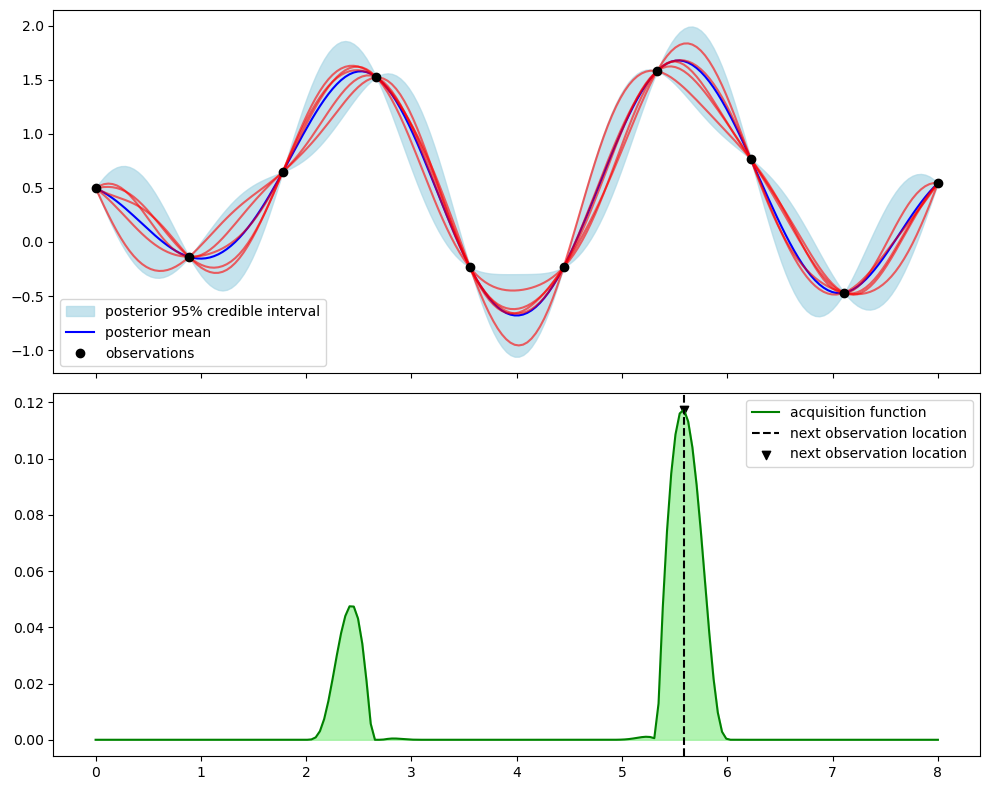

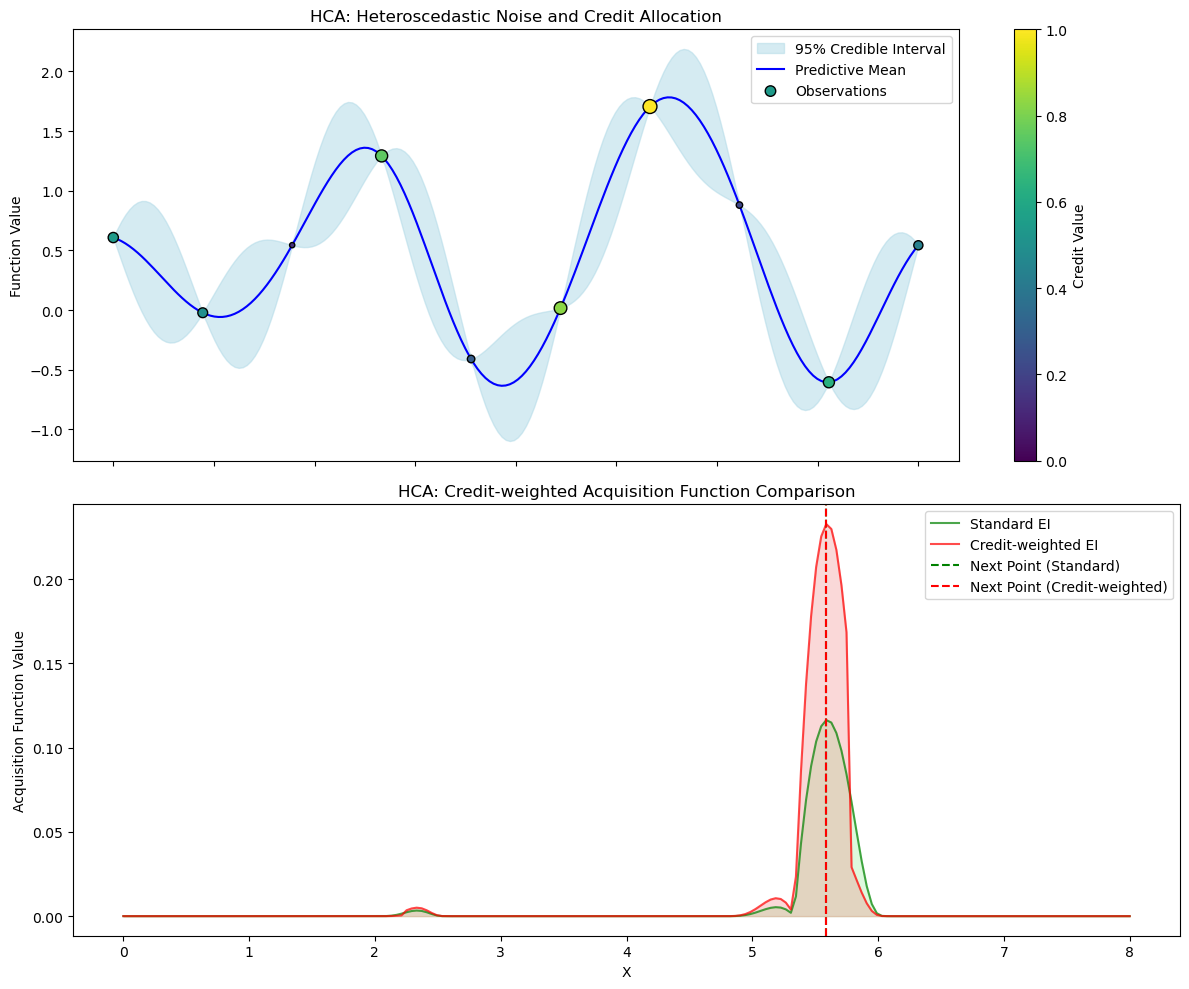

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
from scipy.stats import norm
from scipy.spatial.distance import cdist

# Generate synthetic random data
np.random.seed(42)
X_obs = np.linspace(0, 8, 10).reshape(-1, 1)
Y_obs = np.random.randn(10, 1)

# Fit Gaussian Process
gp_model = GPy.models.GPRegression(X_obs, Y_obs, kernel=GPy.kern.RBF(input_dim=1, lengthscale=1.0))
gp_model.Gaussian_noise.variance = 0.01
gp_model.optimize()

# Predictions
X = np.linspace(0, 8, 200).reshape(-1, 1)
mu, variance = gp_model.predict(X)
sigma = np.sqrt(variance)

# Sampling from GP posterior (multiple samples)
samples = gp_model.posterior_samples_f(X, size=5)

# Acquisition Function (Expected Improvement example)
def EI(mu, sigma, f_best):
    with np.errstate(divide='warn'):
        Z = (mu - f_best) / sigma
        ei = (mu - f_best) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
        return ei

f_best = Y_obs.max()
ei = EI(mu.flatten(), sigma.flatten(), f_best)
next_x = X[np.argmax(ei)]

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# GP Posterior
ax1.fill_between(X.flatten(), (mu - 1.96 * sigma).flatten(), (mu + 1.96 * sigma).flatten(), color='lightblue', alpha=0.7, label='posterior 95% credible interval')
ax1.plot(X, mu, 'b-', label='posterior mean')
for i in range(samples.shape[2]):
    ax1.plot(X, samples[:, :, i], 'r-', alpha=0.6)
ax1.plot(X_obs, Y_obs, 'ko', label='observations')
ax1.legend()

# Acquisition function
ax2.plot(X, ei, 'g-', label='acquisition function')
ax2.fill_between(X.flatten(), 0, ei, color='lightgreen', alpha=0.7)
ax2.axvline(next_x, color='k', linestyle='--', label='next observation location')
ax2.scatter([next_x], [np.max(ei)], color='k', marker='v', label='next observation location')
ax2.legend()

plt.tight_layout()
plt.show()

# Add HCA visualization as a third figure
fig_hca, ax_hca = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Part 1: Predictions with heteroscedastic noise and credit allocation
# Generate simulated credit values
np.random.seed(123)
credits = np.clip(np.abs(np.random.randn(len(X_obs))), 0.1, 2.0)

# Build more sample points for demonstration
X_dense = np.linspace(0, 8, 200).reshape(-1, 1)
Y_dense = np.sin(X_dense) + 0.1 * np.cos(5 * X_dense) + np.random.randn(200, 1) * 0.1

# Heteroscedastic noise based on credit values
noise_scale = 1.0 / np.sqrt(np.clip(credits, 0.1, 10.0))
noise_adjusted = np.array([ns * np.random.randn() for ns in noise_scale])

# Simulate synthetic heteroscedastic noise samples
X_hca = X_obs.copy()
Y_hca = Y_obs.copy() + noise_adjusted.reshape(-1, 1) * 0.2

# Fit GP model
kernel = GPy.kern.RBF(input_dim=1, lengthscale=1.0)
gp_hca = GPy.models.GPRegression(X_hca, Y_hca, kernel=kernel)
gp_hca.Gaussian_noise.variance = 0.01
gp_hca.optimize()

# Predictions
mu_hca, var_hca = gp_hca.predict(X_dense)
sigma_hca = np.sqrt(var_hca)

# Visualize heteroscedastic noise and credit values
ax_hca[0].fill_between(X_dense.flatten(), 
                      (mu_hca - 1.96 * sigma_hca).flatten(), 
                      (mu_hca + 1.96 * sigma_hca).flatten(), 
                      color='lightblue', alpha=0.5, 
                      label='95% Credible Interval')
ax_hca[0].plot(X_dense, mu_hca, 'b-', label='Predictive Mean')

# Adjust point size and color based on credit values
sizes = 50 * credits
colors = plt.cm.viridis(credits / np.max(credits))
scatter = ax_hca[0].scatter(X_hca, Y_hca, s=sizes, c=colors, 
                           edgecolor='k', label='Observations', zorder=10)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax_hca[0])
cbar.set_label('Credit Value')

ax_hca[0].set_ylabel('Function Value')
ax_hca[0].set_title('HCA: Heteroscedastic Noise and Credit Allocation')
ax_hca[0].legend()

# Part 2: Credit-weighted acquisition function
# Calculate standard EI
f_best_hca = Y_hca.max()
ei_standard = EI(mu_hca.flatten(), sigma_hca.flatten(), f_best_hca)

# Calculate credit-weighted EI (simulation)
# Assign credit values to test points based on distance to known samples
dists = cdist(X_dense, X_hca)
nearest_indices = np.argmin(dists, axis=1)
candidate_credits = credits[nearest_indices]

# Credit-weighted EI
ei_credit = ei_standard * candidate_credits

# Get next sampling point locations
next_x_standard = X_dense[np.argmax(ei_standard)]
next_x_credit = X_dense[np.argmax(ei_credit)]

# Plot standard EI and credit-weighted EI
ax_hca[1].plot(X_dense, ei_standard, 'g-', label='Standard EI', alpha=0.7)
ax_hca[1].plot(X_dense, ei_credit, 'r-', label='Credit-weighted EI', alpha=0.7)
ax_hca[1].fill_between(X_dense.flatten(), 0, ei_standard, color='lightgreen', alpha=0.3)
ax_hca[1].fill_between(X_dense.flatten(), 0, ei_credit, color='lightcoral', alpha=0.3)

# Mark next sampling points
ax_hca[1].axvline(next_x_standard, color='g', linestyle='--', label='Next Point (Standard)')
ax_hca[1].axvline(next_x_credit, color='r', linestyle='--', label='Next Point (Credit-weighted)')
ax_hca[1].legend()

ax_hca[1].set_xlabel('X')
ax_hca[1].set_ylabel('Acquisition Function Value')
ax_hca[1].set_title('HCA: Credit-weighted Acquisition Function Comparison')

plt.tight_layout()
plt.show()

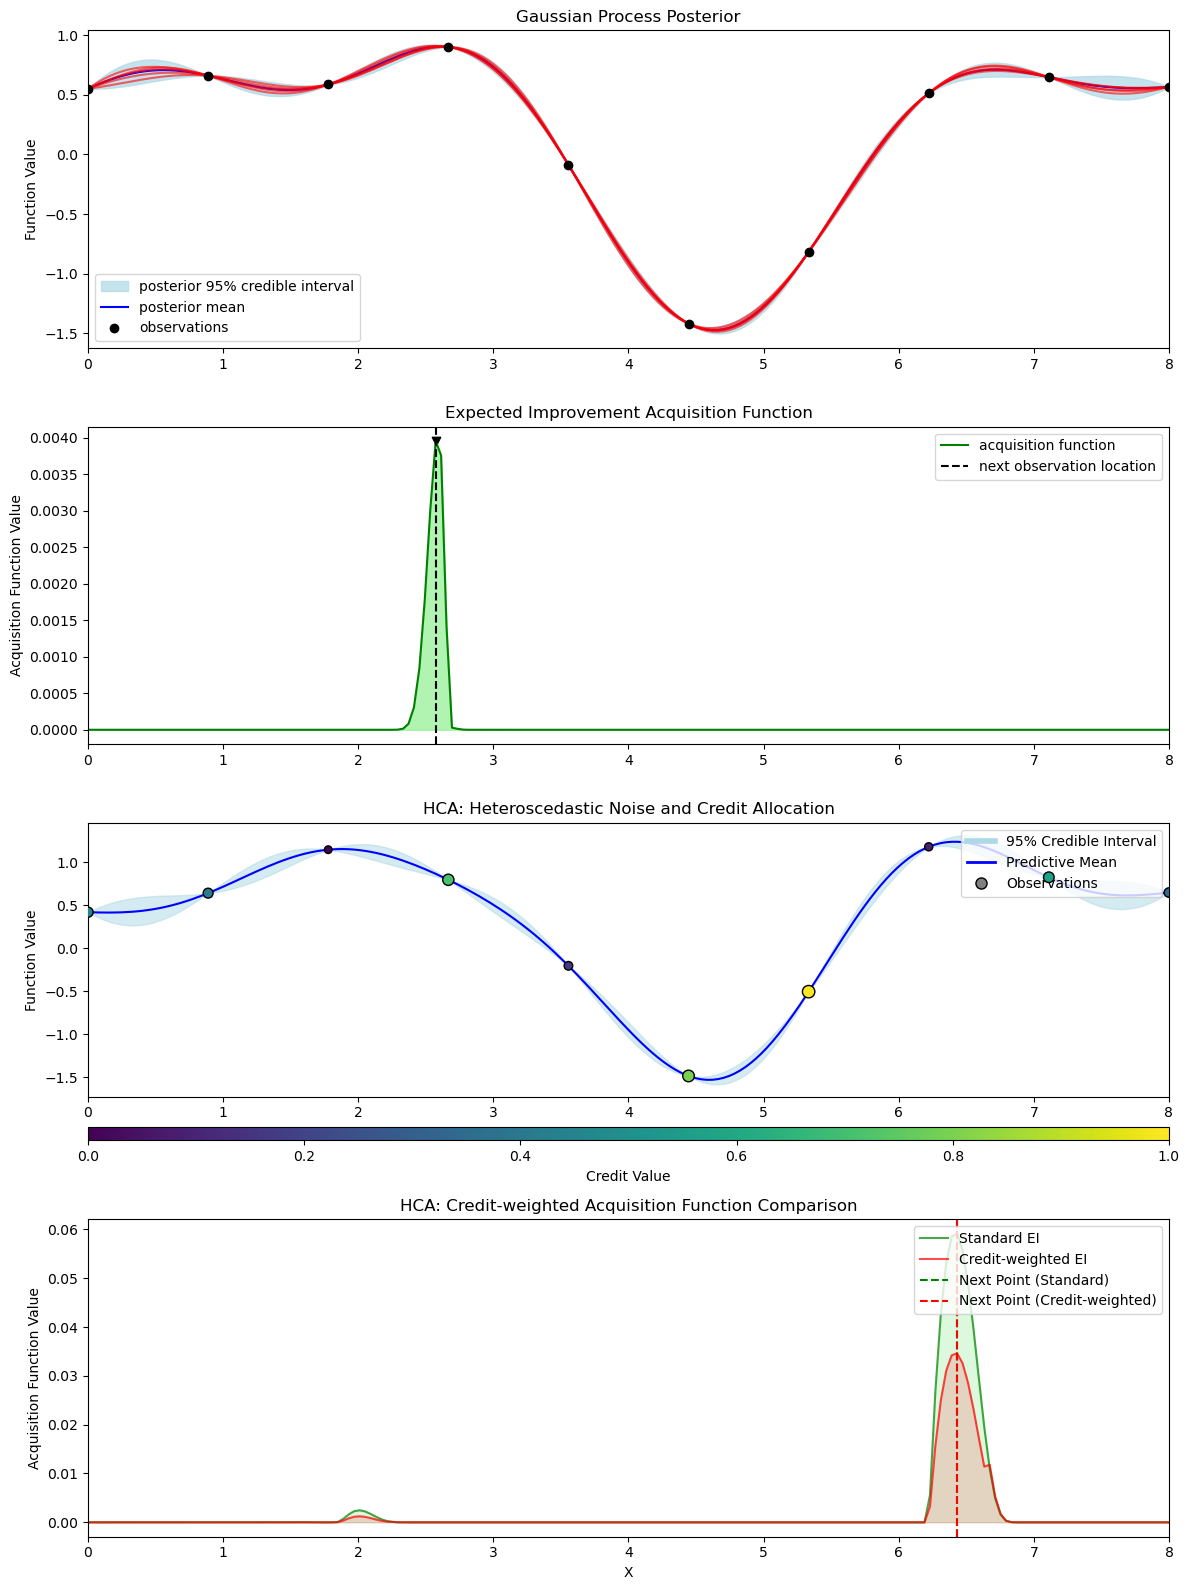

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
from scipy.stats import norm
from scipy.spatial.distance import cdist
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Generate synthetic random data
np.random.seed(42)
X_obs = np.linspace(0, 8, 10).reshape(-1, 1)
Y_obs = np.sin(X_obs) + 0.5 * np.cos(2 * X_obs) + 0.1 * np.random.randn(10, 1)  # More structured data

# Fit Gaussian Process
gp_model = GPy.models.GPRegression(X_obs, Y_obs, kernel=GPy.kern.RBF(input_dim=1, lengthscale=1.0))
gp_model.Gaussian_noise.variance = 0.01
gp_model.optimize()

# Predictions
X = np.linspace(0, 8, 200).reshape(-1, 1)
mu, variance = gp_model.predict(X)
sigma = np.sqrt(variance)

# Sampling from GP posterior (multiple samples)
samples = gp_model.posterior_samples_f(X, size=5)

# Acquisition Function (Expected Improvement example)
def EI(mu, sigma, f_best):
    with np.errstate(divide='warn'):
        Z = (mu - f_best) / sigma
        ei = (mu - f_best) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
        return ei

f_best = Y_obs.max()
ei = EI(mu.flatten(), sigma.flatten(), f_best)
next_x = X[np.argmax(ei)]

# Create a single figure with 4 subplots sharing the x-axis
fig = plt.figure(figsize=(12, 16))
ax1 = plt.subplot(4, 1, 1)
ax2 = plt.subplot(4, 1, 2, sharex=ax1)
ax3 = plt.subplot(4, 1, 3, sharex=ax1)
ax4 = plt.subplot(4, 1, 4, sharex=ax1)

# GP Posterior on ax1
ax1.fill_between(X.flatten(), (mu - 1.96 * sigma).flatten(), (mu + 1.96 * sigma).flatten(), 
                color='lightblue', alpha=0.7, label='posterior 95% credible interval')
ax1.plot(X, mu, 'b-', label='posterior mean')
for i in range(samples.shape[2]):
    ax1.plot(X, samples[:, :, i], 'r-', alpha=0.6)
ax1.plot(X_obs, Y_obs, 'ko', label='observations')
ax1.legend(loc='lower left')
ax1.set_ylabel('Function Value')
ax1.set_title('Gaussian Process Posterior')

# Acquisition function on ax2
ax2.plot(X, ei, 'g-', label='acquisition function')
ax2.fill_between(X.flatten(), 0, ei, color='lightgreen', alpha=0.7)
ax2.axvline(next_x, color='k', linestyle='--', label='next observation location')
ax2.scatter([next_x], [np.max(ei)], color='k', marker='v')
ax2.legend(loc='upper right')
ax2.set_ylabel('Acquisition Function Value')
ax2.set_title('Expected Improvement Acquisition Function')

# HCA Visualization - Part 1 on ax3
# Generate simulated credit values
np.random.seed(123)
credits = np.clip(np.abs(np.random.randn(len(X_obs))), 0.1, 2.0)

# Heteroscedastic noise based on credit values
noise_scale = 1.0 / np.sqrt(np.clip(credits, 0.1, 10.0))
noise_adjusted = np.array([ns * np.random.randn() for ns in noise_scale])

# Simulate synthetic heteroscedastic noise samples
X_hca = X_obs.copy()
Y_hca = Y_obs.copy() + noise_adjusted.reshape(-1, 1) * 0.2

# Fit GP model
kernel = GPy.kern.RBF(input_dim=1, lengthscale=1.0)
gp_hca = GPy.models.GPRegression(X_hca, Y_hca, kernel=kernel)
gp_hca.Gaussian_noise.variance = 0.01
gp_hca.optimize()

# Predictions
mu_hca, var_hca = gp_hca.predict(X)
sigma_hca = np.sqrt(var_hca)

# Visualize heteroscedastic noise and credit values
ax3.fill_between(X.flatten(), 
                (mu_hca - 1.96 * sigma_hca).flatten(), 
                (mu_hca + 1.96 * sigma_hca).flatten(), 
                color='lightblue', alpha=0.5, 
                label='95% Credible Interval')
ax3.plot(X, mu_hca, 'b-', label='Predictive Mean')

# Normalize credit values for visualization
normalized_credits = (credits - credits.min()) / (credits.max() - credits.min())

# Adjust point size based on credit values
sizes = 50 * normalized_credits + 30  # Ensure minimum visibility
scatter = ax3.scatter(X_hca, Y_hca, s=sizes, c=normalized_credits, 
                     edgecolor='k', cmap='viridis', 
                     label='Observations', zorder=10)

# Add a legend with smaller marker sizes to avoid overlap
legend_elements = [
    plt.Line2D([0], [0], color='lightblue', lw=4, label='95% Credible Interval'),
    plt.Line2D([0], [0], color='b', lw=2, label='Predictive Mean'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
               markersize=8, label='Observations', markeredgecolor='k')
]
ax3.legend(handles=legend_elements, loc='upper right')
ax3.set_ylabel('Function Value')
ax3.set_title('HCA: Heteroscedastic Noise and Credit Allocation')

# Add colorbar at the bottom of the subplot
divider = make_axes_locatable(ax3)
cax = divider.append_axes("bottom", size="5%", pad=0.3)
cbar = plt.colorbar(scatter, cax=cax, orientation="horizontal")
cbar.set_label('Credit Value')

# HCA Visualization - Part 2 on ax4
# Calculate standard EI
f_best_hca = Y_hca.max()
ei_standard = EI(mu_hca.flatten(), sigma_hca.flatten(), f_best_hca)

# Calculate credit-weighted EI (simulation)
# Assign credit values to test points based on distance to known samples
dists = cdist(X, X_hca)
nearest_indices = np.argmin(dists, axis=1)
candidate_credits = credits[nearest_indices]
normalized_candidate_credits = (candidate_credits - candidate_credits.min()) / (candidate_credits.max() - candidate_credits.min())

# Credit-weighted EI
ei_credit = ei_standard * (normalized_candidate_credits + 0.5)  # Add offset to keep some weight on all points

# Get next sampling point locations
next_x_standard = X[np.argmax(ei_standard)]
next_x_credit = X[np.argmax(ei_credit)]

# Plot standard EI and credit-weighted EI
ax4.plot(X, ei_standard, 'g-', label='Standard EI', alpha=0.7)
ax4.plot(X, ei_credit, 'r-', label='Credit-weighted EI', alpha=0.7)
ax4.fill_between(X.flatten(), 0, ei_standard, color='lightgreen', alpha=0.3)
ax4.fill_between(X.flatten(), 0, ei_credit, color='lightcoral', alpha=0.3)

# Mark next sampling points
ax4.axvline(next_x_standard, color='g', linestyle='--', label='Next Point (Standard)')
ax4.axvline(next_x_credit, color='r', linestyle='--', label='Next Point (Credit-weighted)')
ax4.legend(loc='upper right')

ax4.set_xlabel('X')
ax4.set_ylabel('Acquisition Function Value')
ax4.set_title('HCA: Credit-weighted Acquisition Function Comparison')

# Set common x-limits for all subplots
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim(0, 8)

plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
from scipy.stats import norm
from scipy.spatial.distance import cdist
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Generate synthetic random data
np.random.seed(42)
X_obs = np.linspace(0, 8, 10).reshape(-1, 1)
Y_obs = np.sin(X_obs) + 0.5 * np.cos(2 * X_obs) + 0.1 * np.random.randn(10, 1)  # More structured data

# Fit Gaussian Process
gp_model = GPy.models.GPRegression(X_obs, Y_obs, kernel=GPy.kern.RBF(input_dim=1, lengthscale=1.0))
gp_model.Gaussian_noise.variance = 0.01
gp_model.optimize()

# Predictions
X = np.linspace(0, 8, 200).reshape(-1, 1)
mu, variance = gp_model.predict(X)
sigma = np.sqrt(variance)

# Sampling from GP posterior (multiple samples)
samples = gp_model.posterior_samples_f(X, size=5)

# Acquisition Function (UCB instead of EI)
def UCB(mu, sigma, kappa=2.0):
    return mu + kappa * sigma

# Calculate UCB values and choose next sampling point
ucb_values = UCB(mu.flatten(), sigma.flatten(), kappa=2.0)
next_x = X[np.argmax(ucb_values)]

# Create a single figure with 4 subplots sharing the x-axis
fig = plt.figure(figsize=(12, 16))
ax1 = plt.subplot(4, 1, 1)
ax2 = plt.subplot(4, 1, 2, sharex=ax1)
ax3 = plt.subplot(4, 1, 3, sharex=ax1)
ax4 = plt.subplot(4, 1, 4, sharex=ax1)

# GP Posterior on ax1
ax1.fill_between(X.flatten(), (mu - 1.96 * sigma).flatten(), (mu + 1.96 * sigma).flatten(), 
                color='lightblue', alpha=0.7, label='posterior 95% credible interval')
ax1.plot(X, mu, 'b-', label='posterior mean')
for i in range(samples.shape[2]):
    ax1.plot(X, samples[:, :, i], 'r-', alpha=0.6)
ax1.plot(X_obs, Y_obs, 'ko', label='observations')
ax1.legend(loc='lower left')
ax1.set_ylabel('Function Value')
ax1.set_title('Gaussian Process Posterior')

# Acquisition function on ax2 (使用 UCB)
ax2.plot(X, ucb_values, 'g-', label='acquisition function (UCB)')
ax2.fill_between(X.flatten(), 0, ucb_values, color='lightgreen', alpha=0.7)
ax2.axvline(next_x, color='k', linestyle='--', label='next observation location')
ax2.scatter([next_x], [np.max(ucb_values)], color='k', marker='v')
ax2.legend(loc='upper right')
ax2.set_ylabel('Acquisition Function Value')
ax2.set_title('UCB Acquisition Function')

# HCA Visualization - Part 1 on ax3
# Generate simulated credit values
np.random.seed(123)
credits = np.clip(np.abs(np.random.randn(len(X_obs))), 0.1, 2.0)

# Heteroscedastic noise based on credit values
noise_scale = 1.0 / np.sqrt(np.clip(credits, 0.1, 10.0))
noise_adjusted = np.array([ns * np.random.randn() for ns in noise_scale])

# Simulate synthetic heteroscedastic noise samples
X_hca = X_obs.copy()
Y_hca = Y_obs.copy() + noise_adjusted.reshape(-1, 1) * 0.2

# Fit GP model for HCA
kernel = GPy.kern.RBF(input_dim=1, lengthscale=1.0)
gp_hca = GPy.models.GPRegression(X_hca, Y_hca, kernel=kernel)
gp_hca.Gaussian_noise.variance = 0.01
gp_hca.optimize()

# Predictions for HCA
mu_hca, var_hca = gp_hca.predict(X)
sigma_hca = np.sqrt(var_hca)

# Visualize heteroscedastic noise and credit values
ax3.fill_between(X.flatten(), 
                (mu_hca - 1.96 * sigma_hca).flatten(), 
                (mu_hca + 1.96 * sigma_hca).flatten(), 
                color='lightblue', alpha=0.5, 
                label='95% Credible Interval')
ax3.plot(X, mu_hca, 'b-', label='Predictive Mean')

# Normalize credit values for visualization
normalized_credits = (credits - credits.min()) / (credits.max() - credits.min())

# Adjust point size based on credit values
sizes = 50 * normalized_credits + 30  # Ensure minimum visibility
scatter = ax3.scatter(X_hca, Y_hca, s=sizes, c=normalized_credits, 
                     edgecolor='k', cmap='viridis', 
                     label='Observations', zorder=10)

# Add a legend with smaller marker sizes to avoid overlap
legend_elements = [
    plt.Line2D([0], [0], color='lightblue', lw=4, label='95% Credible Interval'),
    plt.Line2D([0], [0], color='b', lw=2, label='Predictive Mean'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
               markersize=8, label='Observations', markeredgecolor='k')
]
ax3.legend(handles=legend_elements, loc='upper right')
ax3.set_ylabel('Function Value')
ax3.set_title('HCA: Heteroscedastic Noise and Credit Allocation')

# Add colorbar at the bottom of the subplot
divider = make_axes_locatable(ax3)
cax = divider.append_axes("bottom", size="5%", pad=0.3)
cbar = plt.colorbar(scatter, cax=cax, orientation="horizontal")
cbar.set_label('Credit Value')

# HCA Visualization - Part 2 on ax4
# Calculate standard UCB instead of EI
ucb_standard = UCB(mu_hca.flatten(), sigma_hca.flatten(), kappa=2.0)

# Calculate credit-weighted UCB (simulation)
# Assign credit values to test points based on distance to known samples
dists = cdist(X, X_hca)
nearest_indices = np.argmin(dists, axis=1)
candidate_credits = credits[nearest_indices]
normalized_candidate_credits = (candidate_credits - candidate_credits.min()) / (candidate_credits.max() - candidate_credits.min())

# Credit-weighted UCB
ucb_credit = ucb_standard * (normalized_candidate_credits + 0.5)  # 添加偏置以保证各点都有一定权重

# Get next sampling point locations
next_x_standard = X[np.argmax(ucb_standard)]
next_x_credit = X[np.argmax(ucb_credit)]

# Plot standard UCB and credit-weighted UCB
ax4.plot(X, ucb_standard, 'g-', label='Standard UCB', alpha=0.7)
ax4.plot(X, ucb_credit, 'r-', label='Credit-weighted UCB', alpha=0.7)
ax4.fill_between(X.flatten(), 0, ucb_standard, color='lightgreen', alpha=0.3)
ax4.fill_between(X.flatten(), 0, ucb_credit, color='lightcoral', alpha=0.3)

# Mark next sampling points
ax4.axvline(next_x_standard, color='g', linestyle='--', label='Next Point (Standard)')
ax4.axvline(next_x_credit, color='r', linestyle='--', label='Next Point (Credit-weighted)')
ax4.legend(loc='upper right')

ax4.set_xlabel('X')
ax4.set_ylabel('Acquisition Function Value')
ax4.set_title('HCA: Credit-weighted Acquisition Function Comparison (UCB)')

# Set common x-limits for all subplots
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim(0, 8)

plt.tight_layout()
plt.show()


ImportError: Error importing numpy: you should not try to import numpy from
        its source directory; please exit the numpy source tree, and relaunch
        your python interpreter from there.